# Lab 5: Basics of Regularization

- **Author:** Prof. Mu-Jeung Yang
- **Version:** September 2018
- **Course:** OAMO 3040: Business Econometrics II

In [1]:
import numpy as np
import pandas as pd

### Classification regressions

### 1. The Iris data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_df1 = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df1['ftype'] = iris.target
iris_df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ftype
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df1 = iris_df1[iris_df1['ftype']!=1]

In [7]:
z_dict = {0:0 ,2:1}
iris_df1.ftype = iris_df1.ftype.replace(z_dict)
iris_df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ftype
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Let's choose two features: sepal length and sepal width
H = iris_df1[['petal width (cm)', 'sepal width (cm)']]
z = iris_df1[['ftype']]

#NOTE: We need the next line, whenever we define the target variable based on a column in a dataframe.
z = z.values.ravel()
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### 2. Classification using (unconstrained) Logit

In [9]:
import statsmodels.api as sm

In [10]:
# logit_sm = sm.Logit(z, H)
# logit_result = logit_sm.fit()
# print(logit_result.summary())

### 3. Classification using regularized Logit

In [11]:
from sklearn import linear_model

In [12]:
logitC = linear_model.LogisticRegression(C=1e10)
logit0 = logitC.fit(H, z)
logit0

c:\users\tdmar\qamo-3040\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
logit0.coef_

array([[14.2711043 , -4.57167698]])

In [14]:
#Step 0: create a row vector with the column names of the attributes used
fieldList = np.array(list(H)).reshape(-1,1)

#Step 1: Round coefficient values
logit0_coeffs1 = np.round(logit0.coef_,2)

#Step 2: reshape the coefficient matrix, so you have 2 rows and 1 column
logit0_coeffs2 = np.reshape(logit0_coeffs1,(-1,1))

#Step 3: Concatenate (link results and column names)
logit0_coeffs3=np.concatenate((fieldList,logit0_coeffs2),axis=1)

#Step 4: display results in a Pandas dataframe
pd.DataFrame(logit0_coeffs3,columns=['Attribute','Coeff. value'])

,Attribute,Coeff. value
0,petal width (cm),14.27
1,sepal width (cm),-4.57


### 4. Out of sample prediction with Train-test split

#### Conduct Train-test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
H_train, H_test, z_train, z_test = train_test_split(H, z, test_size=0.33, random_state=42)

#### Train the model and display results (on the training data)

In [17]:
logitC = linear_model.LogisticRegression(C=1e10)
logit1 = logitC.fit(H_train, z_train)
logit1.coef_

c:\users\tdmar\qamo-3040\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[14.47889464, -4.59195882]])

In [18]:
#Step 0: create a row vector with the column names of the attributes used
fieldList = np.array(list(H_train)).reshape(-1,1)

#Step 1: create a row vector with the column names of the attributes used
logit1_coeffs1 = np.round(logit1.coef_,2)

#Step 2: reshape the coefficient matrix, so you have 2 rows and 1 column
logit1_coeffs2 = np.reshape(logit1_coeffs1,(-1,1))

#Step 3: Concatenate (link results and column names)
logit1_coeffs3=np.concatenate((fieldList,logit1_coeffs2),axis=1)

#Step 4: display results in a Pandas dataframe
pd.DataFrame(logit1_coeffs3,columns=['Attribute','Coeff. value'])

,Attribute,Coeff. value
0,petal width (cm),14.48
1,sepal width (cm),-4.59


#### Formal predictive model evaluation measures
For help on the accuracy score, see http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
print("Accuracy score:", logit1.score(H_test, z_test))

Accuracy score: 1.0


For more details on the confusion matrix in scikit-learn, see http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
z_pred = logit1.predict(H_test)
cmatrix = confusion_matrix(z_test, z_pred)
print(cmatrix)

[[19  0]
 [ 0 14]]


### 5. Graphical Analysis of the Decision boundary


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

(1.2000000000000002, 5.300000000000003)

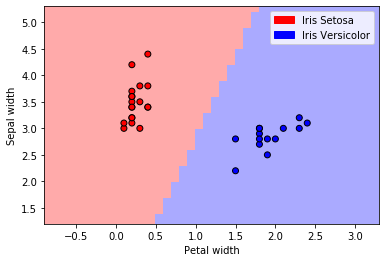

In [23]:
para = 0.1
# Set up a grid of predictor values from H_test
x_min, x_max = H_test.values[:, 0].min() - 1, H_test.values[:, 0].max() + 1
y_min, y_max = H_test.values[:, 1].min() - 1, H_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

#(1) Combine predictor values WITH PREDCITIONS
Z = logit1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
#(2) Colored map of decision boundary by trained model as defined in (1). Map contains prediction of classes.
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

#(3) Actual test data points (color indicated true class of test data)
ax.scatter(H_test.values[:, 0], H_test.values[:, 1], c=z_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal width')

patch1 = mpatches.Patch(color='#FF0000', label='Iris Setosa')
patch2 = mpatches.Patch(color='#0000FF', label='Iris Versicolor')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

As you can see, one can perfectly classify the two types of flowers Iris Setosa vs Iris Versicolor just based on Petal width alone!

#### <font color='blue'>EXCERCISE:</font> Classification using Logit
<font color='blue'> a) Set up the matrix of predictors and call it H2, consisting of petal width and septal width. Addtionally, use all three flower types and call the target variable z2. Then split the data into training and test sets using random_state=42. Hint: Start with a new data frame iris_df = pd.DataFrame(iris.data, columns = iris.feature_names). </font>

In [24]:
#Enter code
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['z2'] = iris.target
X = iris_df[['petal width (cm)', 'sepal width (cm)']]
y = iris_df[['z2']]
y2 = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.33, random_state=42)


<font color='blue'> b) Run a logistic regression on the training data using Scikit-learn and display the coefficients. Hint: you will need to add another step to the code above, transposing a matrix. Check out in the documentation how the coefficients are displayed in logit.coef_ and think about a transpose will help you with correctly displaying the coefficients in a Pandas generated table.</font>

In [25]:
#Enter code
logit_c = linear_model.LogisticRegression(C=1e10)
logit = logit_c.fit(X_train, y_train)
field_list = np.array(list(X_train)).reshape(-1,1)
logit_coeffs = np.round(logit.coef_, 2)
field_list2 = np.reshape(field_list, -1, 1)
logit_coeffs3 = np.vstack((field_list2, logit_coeffs))
pd.DataFrame(logit_coeffs3[1:], columns=logit_coeffs3[0])

c:\users\tdmar\qamo-3040\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tdmar\qamo-3040\venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,petal width (cm),sepal width (cm)
0,-24.84,6.93
1,-0.17,-3.7
2,16.6,-5.86


<font color='blue'> c) Now, proceed the same way we have look at the quality of our predictive model in the context of linear regressions: First generate predictions of flower-types from the trained model. Then plot the out-of-sample predictions  against the true values. What is the problem with that graph?</font>

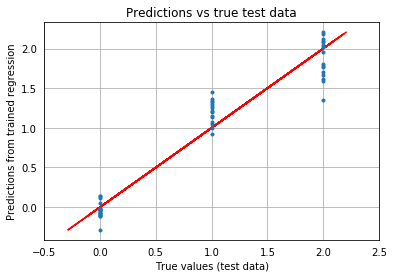

In [26]:
lm = linear_model.LinearRegression()
linear = lm.fit(X_train, y_train)

y_pred = linear.predict(X_test)
fig, ax = plt.subplots()
ax.plot(y_pred, y_pred, color='red')
ax.plot(y_test, y_pred, '.')
ax.set_ylabel("Predictions from trained regression")
ax.set_xlabel("True values (test data)")
ax.set_title("Predictions vs true test data")
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(-0.5,2.5)
ax.grid(True)
plt.show()

The problem here is that the predicted values can be numbers other than 0, 1, or 2 which represent the categories they belong to. Having decimal values doesn't make sense in this context.

<font color='blue'> d) Compute the accuracy score for your trained logit classifier and interpret it.</font>

In [27]:
print('Accuracy Score:', logit.score(X_test, y_test))

Accuracy Score: 0.98


The regression correctly predicited the flower classification for 98% of observations within the test data.

<font color='blue'> e) Compute the confusion matrix and interpret it.</font>

In [28]:
y2_pred = logit.predict(X_test)
cmatrix = confusion_matrix(y_test, y2_pred)
print(cmatrix)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


This matrix shows that one observation was predicted to be classfication 1 but it was actually classification 2.

<font color='blue'> f) Plot the decision boundaries along the two predictor variables and the test data scatterplot with it. Explain, why in this case petal width alone is not sufficient to perfectly predict all three flower types.</font>

(1.2000000000000002, 5.300000000000003)

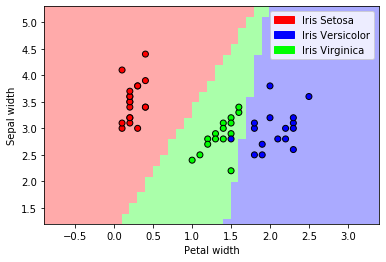

In [29]:
para2 = 0.1
x2_min, x2_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y2_min, y2_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, para2), np.arange(y2_min, y2_max, para2))

#(1) Combine predictor values WITH PREDCITIONS
Z2 = logit.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx2.shape)

cmap_light2 = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold2 = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
#(2) Colored map of decision boundary by trained model as defined in (1). Map contains prediction of classes.
ax.pcolormesh(xx2, yy2, Z2, cmap=cmap_light2)

#(3) Actual test data points (color indicated true class of test data)
ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold2)
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal width')

patch1 = mpatches.Patch(color='#FF0000', label='Iris Setosa')
patch2 = mpatches.Patch(color='#0000FF', label='Iris Versicolor')
patch3 = mpatches.Patch(color='#00ff00', label='Iris Virginica')
ax.legend(loc = 'best', handles=[patch1, patch2, patch3])
ax.set_xlim(xx2.min(), xx2.max())
ax.set_ylim(yy2.min(), yy2.max())

We can see from this visualization that one of the Iris Versicolors was incorrectly predicted to be Iris Virgnica. In order to correctly classify all plants it is important that we have all the important features like sepal width in addition to petal width.